# Daftar Isi

- [Daftar Isi](#daftar_isi)
- [Pendahuluan](#pendahuluan)
- [Pengantar Proyek](#pengantar_proyek)
- [Tujuan Proyek](#tujuan_proyek)
- [Tahapan Proyek](#tahapan_proyek)
- [Memuat seluruh Library dan Membaca filenya](#1)
- [Pra-Pemrosesan Data](#2)
- [Analisa Data](#3)
    - [Proporsi dari berbagai jenis usaha](#31)
    - [Proporsi dari usaha berbasis rantai dan non-rantai](#32)
    - [Jenis usaha yang biasanya menggunakan rantai ](#33)
    - [Menampilkan ciri-ciri usaha yang menggunakan chian berdasarkan banyak atau sedikit jumlah tempat duduk](#34)
    - [Menentukan jumlah rata-rata kursi untuk setiap jenis usaha makanan dan melihat usaha makanan yang paling banyak rata-rata kursinya](#35)
    - [Pindahkan data nama jalan dari kolom address ke kolom terpisah](#36)
    - [Buatlah grafik yang menampilkan sepuluh nama jalan terbaik berdasarkan jumlah restoran](#37)
    - [Temukan jumlah jalan yang hanya memiliki satu restoran](#38)
    - [Untuk jalan yang dihuni oleh banyak restoran, perhatikan distribusi jumlah kursinya. Tren apa yang bisa Anda amati?](#39)
- [Kesimpulan & Rekomendasi](#4)
    - [Kesimpulan](#41)
    - [Rekomendasi](#42)

# Pendahuluan

Setiap kali kita melakukan penelitian, kita memerlukan analisa secara menyeluruh dengan seksama. Untuk membuat keputusan yang tepat, sebuah bisnis harus dapat memahami apakah analisa yang dibuatnya benar atau tidak.

Dalam proyek ini, diminta mempersiapkan sejumlah riset pasar untuk membuka sebuah kafe kecil di Los Angeles. Kafe Anda bisa dibilang cukup unik, karena Anda "memperkerjakan" robot sebagai pelayan atau pramusaji dan menarik minat investor.

# Deksripsi Proyek

Anda telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe Anda bisa dibilang cukup unik, karena Anda "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, namun membutuhkan modal yang besar. Oleh karena itu, Anda dan para mitra Anda memutuskan untuk menarik minat investor. Mereka tertarik dengan kondisi pasar saat ini—namun, mampukah Anda mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?
Mengingat Anda adalah seorang pakar analisis, para mitra pun meminta Anda untuk mempersiapkan sejumlah riset pasar. Anda memiliki data dari sumber terbuka (open source) terkait restoran-restoran di LA.

# Tujuan Proyek

Proyek ini ditujukan untuk menarik minat investor dalam mempersiapkan usaha kafe kecil di Los Angeles karena mempunyai konsep unik yaitu memperkerjakan robot sebagai pelayan atau pramusaji.

# Tahapan Proyek

Ada file yang akan dianalisa, yaitu `/datasets/rest_data_us.csv` dengan format *object_name — (nama usaha)*, *chain — (usaha berbasis rantai (TRUE/FALSE))*, *object_type — (jenis usaha)*, *address — (alamat)*, *number — (jumlah kursi)*. 

Lalu melakukan pra-pemrosesan data sebelum dianalisa, setelah itu maka akan langsung di analisa beberap poin, yaitu:

- Melihat Proporsi berbagai jenis usaha
- Melihat Proporsi jenis rantai usaha
- Melihat ciri-ciri dari usaha berbasis rantai dari jumlah tempat duduk
- Melihat rata-rata kursi untuk setiap jenis restoran
- Melihat sepuluh nama jalan terbaik berdasarkan jumlah restoran.
- Melihat jumlah jalan yang hanya memiliki satu restoran.
- Melihat distribusi jumlah kursinya

## Memuat seluruh Library dan Membaca filenya

In [ ]:
# Membuat semua Libary
import pandas as pd, numpy as np
# Memuat Data Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
# Membuat Uji Statistik
import scipy.stats as st
# Menyembunyikan warning
import warnings

In [ ]:
# Membuat set kolom untuk kolom bisa dibaca jika panjang
pd.set_option('display.max_columns', 100)
# Membuat warning untuk di abaikan dan disembunyikan
warnings.filterwarnings('ignore')

In [ ]:
# Memuat file tabel restoran
df_restaurant = pd.read_csv('/datasets/rest_data_us.csv')

In [ ]:
# Melihat tabelnya
df_restaurant.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


**Deskripsi Data**

Tabel df_restaurant:

- object_name — nama usaha
- chain — usaha berbasis rantai (TRUE/FALSE)
- object_type — jenis usaha
- address — alamat
- number — jumlah kursi

In [ ]:
# Melihat informasi keseluruhan pada tabel restoran
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [ ]:
# Melihat nilai yang hilang pada tabel restoran
df_restaurant.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [ ]:
# Melihat nilai yang duplikasi pada tabel restoran
df_restaurant.duplicated().sum()

0

Setelah melihat dan menganalisa tabel restoran, maka didapatkan beberapa kesimpulan untuk tabel ini, yaitu:

- Mempunyai masalah untuk nilai hilang pada kolom chain.
- Mempunyai masalah untuk tipe data pada kolom chain.
- Tidak mempunyai masalah untuk data duplikasi pada tabelnya.
- Tidak mempunyai masalah untuk nama kolom, tetapi untuk `object_name` dan `object_type` rasanya kurang tepat.

## Pra-Pemrosesan Data

In [ ]:
# Melihat nilai yang hilang
df_restaurant[df_restaurant['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Masing-masing nilai yang hilang ini merupakan hanya toko dengan satu cabang saja, jadi lebih baik di drop untuk nilai-nilau pada chain yang hilang.

In [ ]:
# Melihat data beserta jumlah baris dan kolom
df_restaurant

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [ ]:
# Menghilangkan nilai NaN pada kolom chain
df_restaurant = df_restaurant[~df_restaurant['chain'].isna()]

In [ ]:
# Melihat kembali data beserta jumlah baris dan kolom
df_restaurant

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


Jumlah kolom yang berkurang hanya 3, sesuai dengan nilai yang hilang hanya 3 baris.

In [ ]:
# Mengubah tipe data pada kolom chain

df_restaurant['chain'] = df_restaurant['chain'].astype(bool)

In [ ]:
# Melihat tipe data dari informasi
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


Setelah selesai memperbaiki untuk kolom chain, sekarang untuk mengubah kolom `object_name`, `object_type`, dan `number`. Walaupun tidak ada masalah untuk nama kolom tersebut, tetapi lebih baik untuk dirapihkan agar lebih enak untuk dibaca nama kolom tersebut. Karena nanti akan di presentasikan, dan hal itu harus dibuat sesederhana mungkin namanya agar orang lain mengerti apa yang di maksud.

In [ ]:
# mengganti nama kolom
df_restaurant.columns = ['id', 'name', 'address', 'chain', 'type', 'total_seats']

In [ ]:
# Melihat hasilnya
df_restaurant.head()

,id,name,address,chain,type,total_seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Setelah semua hal yang harus di lakukan di Pra-Pemrosesan data selesai, saatnya melakukan analisa datanya untuk keperluan presentasi kepada para investor.

## Analisa Data

### Proporsi dari berbagai jenis usaha.

untuk melihat proporsi dari berbagai jenis usaha perlu melakukan penghitungan jumlah jenis tipe usahanya berdasarkan id usahanya

In [ ]:
# Membuat variabel untuk menghitung jumlah usahanya
business_count = df_restaurant.groupby('type').count()['id'].reset_index()
business_count.columns = ['type', 'count']
business_count

,type,count
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,319
5,Restaurant,7253


In [ ]:
# Membuat variabel untuk menghitung proporsinya
business_proportion = df_restaurant.groupby('type').count()['id'] / len(df_restaurant) * 100
business_proportion = business_proportion.reset_index()
business_proportion.columns = ['type', 'proportion']
business_proportion

,type,proportion
0,Bakery,2.933250
1,Bar,3.026534
2,Cafe,4.508706
3,Fast Food,11.048922
4,Pizza,3.306385
5,Restaurant,75.176202


In [ ]:
# Menggabungkan count dan proportion
business_count = business_count.merge(business_proportion, how='left', on = 'type')
business_count.sort_values('count', ascending=False)

,type,count,proportion
5,Restaurant,7253,75.176202
3,Fast Food,1066,11.048922
2,Cafe,435,4.508706
4,Pizza,319,3.306385
1,Bar,292,3.026534
0,Bakery,283,2.933250


Setelah di lihat, bahwa jenis usaha restoran sangatlah mendominasi sebesar 75%. Karena grafik terbaik untuk melihat proporsi adalah grafik lingkaran / Pie-Chart. Tetapi, kondisi ini tidak bisa dilakukan karena jenis usaha restoran sangat mendominasi sebesar 75% dan untuk proporsinya dibawah 10% tidak akan terlihat secara baik, sebaiknya untuk mengganti dengan grafik bar.

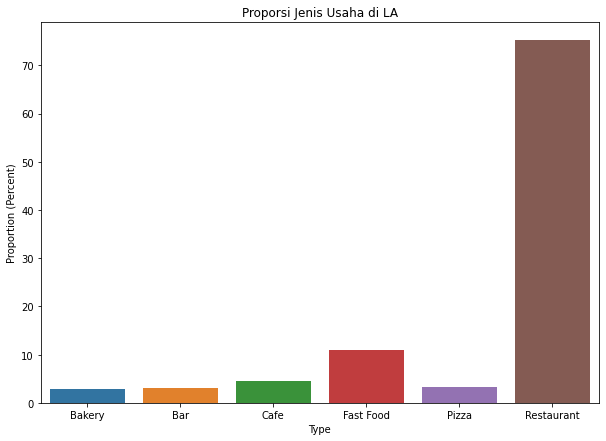

In [ ]:
# Membuat barplot untuk proporsi jenis usaha
plt.figure(figsize=(10, 7))
sns.barplot(data=business_count, x='type', y='proportion').set(ylabel='Proportion (Percent)', xlabel='Type')

#plt.set(ylabel='Proportion (Percent)', xlabel='Type')
plt.title('Proporsi Jenis Usaha di LA')
plt.show()

Usaha jenis Restoran sangat mendominasi sebesar 75%, sementara yang tertinggi kedua yaitu Fast Food sebesar 11%. Sisanya untuk Bakert, Bar, Cafe, dan Pizza berdara di bawah 10% untuk di kota LA.

### Proporsi dari usaha berbasis rantai dan nonrantai

untuk melihat proporsi chain usaha perlu melakukan penghitungan jumlah chainnya berdasarkan id usahanya 

In [ ]:
# Membuat variabel untuk menghitung jumlah usahanya
business_chain = df_restaurant.groupby('chain').count()['id'].reset_index()
business_chain.columns = ['chain', 'count']
business_chain

,chain,count
0,False,5972
1,True,3676


In [ ]:
# Membuat variabel untuk menghitung proporsinya
business_chain2 = df_restaurant.groupby('chain').count()['id'] / len(df_restaurant) * 100
business_chain2 = business_chain2.reset_index()
business_chain2.columns = ['chain', 'proportion']
business_chain2

,chain,proportion
0,False,61.898839
1,True,38.101161


In [ ]:
# Menggabungkan count dan proportion
business_chain = business_chain.merge(business_chain2, how='left', on = 'chain')
business_chain.sort_values('count', ascending=False)

,chain,count,proportion
0,False,5972,61.898839
1,True,3676,38.101161


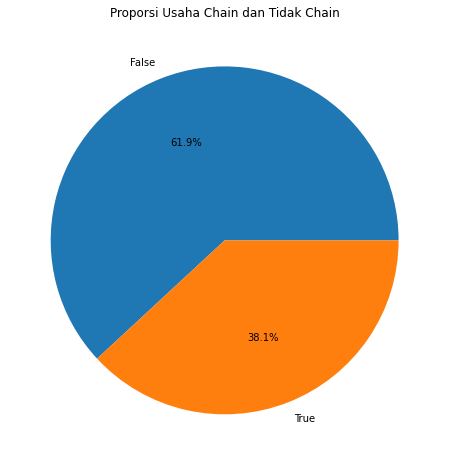

In [ ]:
# Membuat Pie-Chart untuk proporsi usaha yang melakukan chain dan tidak
plt.figure(figsize=(8, 8))
plt.pie(business_chain['count'], labels =business_chain['chain'], autopct='%1.1f%%')
plt.title('Proporsi Usaha Chain dan Tidak Chain')

plt.show()

Dapat disimpulkan, bahwa usaha yang tidak melakukan chain lebih sebesar 61,9% dibanding yang melakukan chain sebesar 38,1%.

### Jenis usaha yang biasanya menggunakan rantai 

Untuk melihat jenis usaha yang biasanya menggunakan rantai maka perlu analisa jumlah usaha yang melakukan chain dengan menghitung dari id usahanya.

In [ ]:
# Aggregasi usaha chain berdasarkan jenis usahanya
grouped_chain_type = pd.pivot_table(df_restaurant, values='name', index='type', columns='chain', aggfunc='count', fill_value=0)
grouped_chain_type

chain,False,True
type,,
Bakery,0,283
Bar,215,77
Cafe,169,266
Fast Food,461,605
Pizza,166,153
Restaurant,4961,2292


Sepertinya usaha Bakery tidak ada yang tidak chain sama sekali, sebaiknya mari cek kebenarannya dari data utama.

In [ ]:
# Melihat Chain untuk usaha Bakety
df_restaurant[df_restaurant['type'] == 'Bakery']['chain'].value_counts()

True    283
Name: chain, dtype: int64

Ternyata memang benar bahwa semua usaha Bakery tidak ada yang tidak chain, semuanya menggunakan chain.

In [ ]:
# Menghitung rasio untuk chain dan tidak chain
grouped_chain_type['ratio'] = (grouped_chain_type[True] / (grouped_chain_type[True] + grouped_chain_type [False])) * 100
grouped_chain_type

chain,False,True,ratio
type,,,
Bakery,0,283,100.000000
Bar,215,77,26.369863
Cafe,169,266,61.149425
Fast Food,461,605,56.754221
Pizza,166,153,47.962382
Restaurant,4961,2292,31.600717


<AxesSubplot:xlabel='type'>

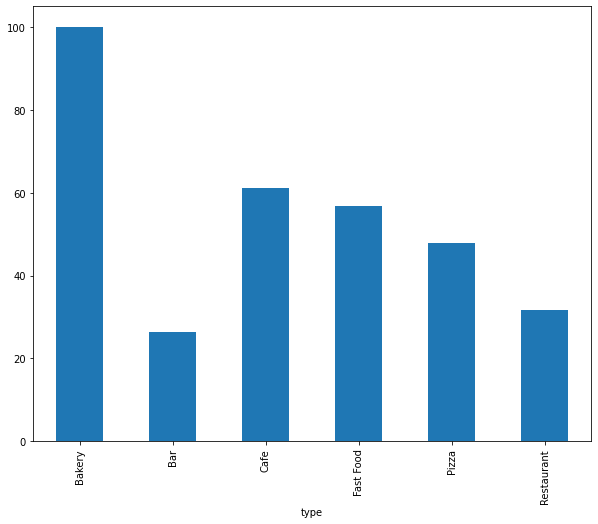

In [ ]:
# Membuat plot bar untuk kategorik
grouped_chain_type['ratio'].plot.bar(figsize=(10, 8))

Usaha Bakery merupakan usaha yang dimana semaunya menggunakan chain dengan rasio 100%, tetapi usaha yang terbanyak menggunakan chain adalah usaha Restoran walapun rasionya hanya 31%.

### Menampilkan ciri-ciri usaha yang menggunakan chian berdasarkan banyak atau sedikit jumlah tempat duduk

Untuk mengetahui ciri-ciri usaha yang menggunakan chain berdasarkan tempat duduknya, maka perlu untuk identifikasi usaha makanan untuk yang menggunakan chain dan tidak menggunakan chain, setelah itu akan ditampilkan distribusi tempat duduk berdasarkan jenis usaha makanannya.

In [ ]:
# Membuat varibel untuk usaha yang menggunakan chain
food_chain_true = df_restaurant[df_restaurant['chain'] == True]

In [ ]:
# Membuat varibel untuk usaha yang tidak menggunakan chain
food_chain_false = df_restaurant[df_restaurant['chain'] == False]

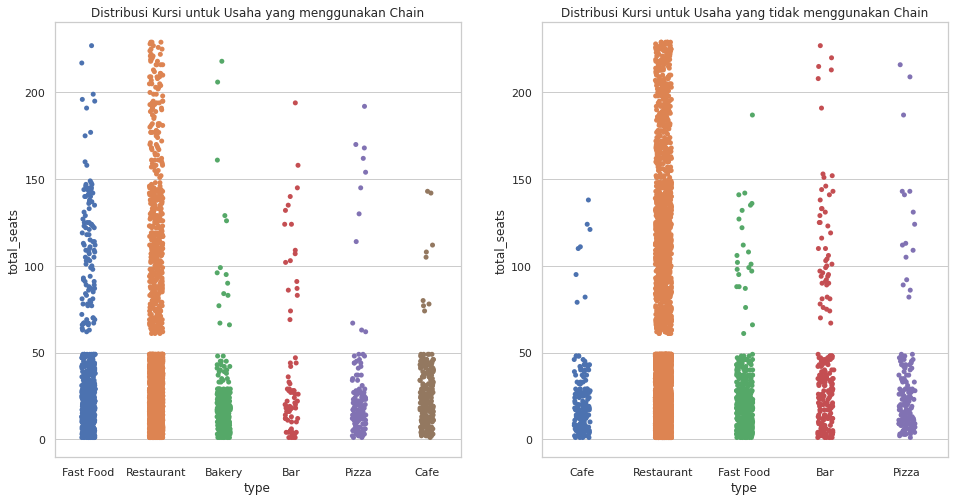

In [ ]:
# Membuat grafik distribusi data berdasarkan kategorik untuk chain dan tidak chain

sns.set(style = 'whitegrid')
plt.figure(figsize= (16,8))
plt.subplot(1, 2, 1)
plt.title('Distribusi Kursi untuk Usaha yang menggunakan Chain')
sns.stripplot(data=food_chain_true, x='type', y='total_seats')

plt.subplot(1, 2, 2)
plt.title('Distribusi Kursi untuk Usaha yang tidak menggunakan Chain')
sns.stripplot(data=food_chain_false, x='type', y='total_seats')
plt.show()

Kesimpulan:

Bahwa untuk ciri-ciri usaha yang menggunakan chain bahwa penggunaan tempat duduk lebih sedikit dibanding yang tidak menggunakan chain. Tetapi, untuk usaha makanan seperti `Fast Food` dan `Cafe` lebih banyak tempat duduk untuk yang menggunakan chain dari pada yang tidak menggunakan chain, hal ini dapat dibuktikan dengan grafik diatas. Baik untuk usaha yang tempat duduknya dibawah 50 maupun diatas 50.

### Menentukan jumlah rata-rata kursi untuk setiap jenis usaha makanan dan melihat usaha makanan yang paling banyak rata-rata kursinya.

Untuk menentukan rata-rata kursi setiap jenis usaha makanan, perlu untuk agregasi jenis usaha makanan berdasarkan rata-rata jumlah kursinya.

In [ ]:
# Membuat variabel untuk aggregasi jenis usaha makanan berdasarkan rata-rata kursinya
avg_chain = df_restaurant.groupby('type').agg({'total_seats':'mean'}).reset_index()
avg_chain

,type,total_seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.545455
5,Restaurant,48.048807


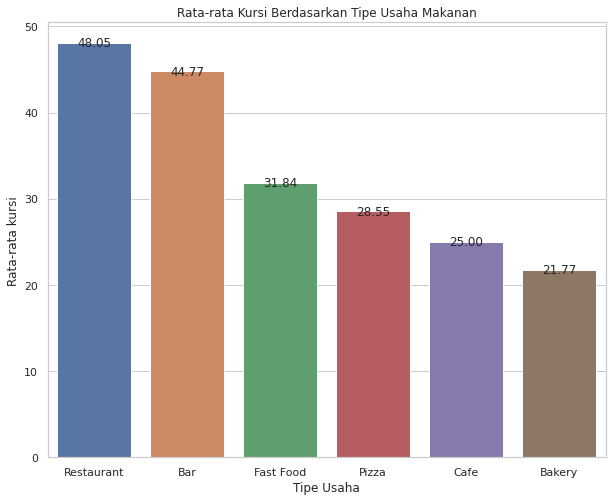

In [ ]:
# Menampilkan grafik dari variabel aggrergasi rata-rata kursi berdasarkan jenis usaha makanan dengan grafik barplot

plt.figure(figsize=(10, 8))
ax = sns.barplot(data = avg_chain.sort_values('total_seats', ascending=False), 
                 x='type', 
                 y='total_seats')

plt.xlabel('Tipe Usaha')
plt.ylabel('Rata-rata kursi')
plt.title('Rata-rata Kursi Berdasarkan Tipe Usaha Makanan')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center')

plt.show()

Kesimpulan:
    
Bahwa Usaha makanan yang paling banyak kursinya secara berurutan, yaitu:

- `Restoran` dengan rata-rata kursi: 48.05
- `Bar` dengan rata-rata kursi: 44.77
- `Fast` Food dengan rata-rata kursi: 31.84
- `Pizza` dengan rata-rata kursi: 28.55
- `Cafe` dengan rata-rata kursi: 25.00
- `Bakery` dengan rata-rata kursi: 21.77

### Pindahkan data nama jalan dari kolom address ke kolom terpisah.

Perlu untuk membuat kolom baru yang berisi data nama jalan dari kolom address secara terpisah. Untuk menganalisa lebih lanjut.

In [ ]:
# Membuat kolom baru untuk memfilter nama jalan
df_restaurant['street_name'] = df_restaurant['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df_restaurant

,id,name,address,chain,type,total_seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


### Buatlah grafik yang menampilkan sepuluh nama jalan terbaik berdasarkan jumlah restoran.

Untuk mengetahui dan menampilkan 10 jalan dengan usaha makanan terbanyak, perli melakukan penghitungan restoran berdasarkan nama jalannya yang sudah ada pada kolom baru.

In [ ]:
# Menghitung restoran berdasarkan nama jalan

street_type = df_restaurant.groupby('street_name').agg({'street_name':'count'})
street_type.columns = ['count']
street_type = street_type.reset_index()
street_type

,street_name,count
0,1/2 3RD ST,1
1,1/2 7TH ST,1
2,1/2 BEVERLY BLVD,3
3,1/2 CITY TERRACE DR,1
4,1/2 COLORADO BLVD,1
...,...,...
3092,YUCCA ST,3
3093,Z00 DR,1
3094,ZONAL AVE,4
3095,ZOO DR,1


In [ ]:
# Membuat untuk 10 nama jalan dengan jumlah usaha makan terbanyak
top_10 = street_type.sort_values(by='count', ascending=False).head(10)
top_10

,street_name,count
2691,W SUNSET BLVD,296
2622,W PICO BLVD,288
582,HOLLYWOOD BLVD,167
2837,WILSHIRE BLVD,161
1705,S VERMONT AVE,148
1918,SANTA MONICA BLVD,146
2170,W 3RD ST,145
147,BEVERLY BLVD,135
1295,S FIGUEROA ST,134
755,MELROSE AVE,128


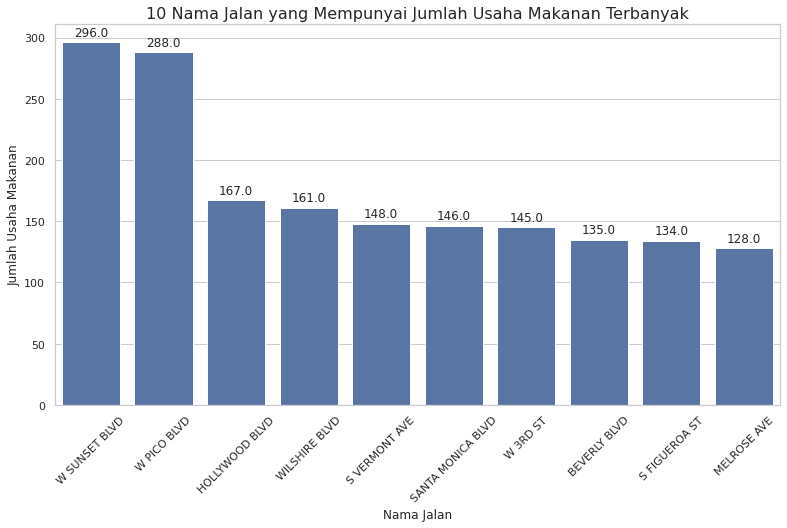

In [ ]:
# Membuat diagram untuk 10 nama jalan dengan jumlah usaha makan terbanyak

# Membuat ukuran grafiknya
plt.figure(figsize=(13, 7))
# Membuat barplot dengan seaborn
ax = sns.barplot(data = top_10, 
                 x='street_name', 
                 y='count',
                 color='b')

# Menambahkan label untuk X, Y, dan Judul Grafik
plt.xlabel('Nama Jalan')
plt.ylabel('Jumlah Usaha Makanan')
plt.title('10 Nama Jalan yang Mempunyai Jumlah Usaha Makanan Terbanyak', fontsize=16)
# Membuat tampilan untuk angka berdasarkan barplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
# label untuk X dibuat miring 45 derajat
plt.xticks(rotation=45)
# Menampilkan grafik
plt.show()

Kesimpulan:

Adapun 10 nama jalan dengan jumlah usaha makanan terbanyak di LA berdasarkan urutan, yaitu:

- `W SUNSET BLVD` dengan jumlah usaha makanan sebanyak: 296
- `W PICO BLVD` dengan jumlah usaha makanan sebanyak: 288
- `HOLLYWOOD BLVD` dengan jumlah usaha makanan sebanyak: 167
- `WULSHIRE BLVD` dengan jumlah usaha makanan sebanyak: 161
- `S VERMONT AVE` dengan jumlah usaha makanan sebanyak: 148
- `SANTA MONICA BLVD` dengan jumlah usaha makanan sebanyak: 146
- `W 3RD ST` dengan jumlah usaha makanan sebanyak: 145
- `BEVERLY BLVD` dengan jumlah usaha makanan sebanyak: 135
- `S FIGUEROA ST` dengan jumlah usaha makanan sebanyak: 134
- `MEROSE AVE` dengan jumlah usaha makanan sebanyak: 128

### Temukan jumlah jalan yang hanya memiliki satu restoran.

untuk menemukan jumlah jalan yang hanya memliki satu usaha makanan, perlu identifikasi nama jalan yang hanya mempunyai 1 usaha makanan saja dari varibael diatas sebelumnya.

In [ ]:
# Memfilter usaha makanan yang hanya 1 nama jalan dengan jumlah 1 usaha makanan
only_one = street_type.query('count == 1').reset_index(drop=True)
only_one

,street_name,count
0,1/2 3RD ST,1
1,1/2 7TH ST,1
2,1/2 CITY TERRACE DR,1
3,1/2 COLORADO BLVD,1
4,1/2 E 2ND ST,1
...,...,...
2476,YALE ST,1
2477,YORK BLVD # B,1
2478,Z00 DR,1
2479,ZOO DR,1


In [ ]:
print('Jumlah jalan yang hanya ada 1 usaha makanan di LA sebanyak: {}'.format(len(only_one)))

Jumlah jalan yang hanya ada 1 usaha makanan di LA sebanyak: 2481


### Untuk jalan yang dihuni oleh banyak restoran, perhatikan distribusi jumlah kursinya. Tren apa yang bisa Anda amati?

In [ ]:
df_restaurant.head()

,id,name,address,chain,type,total_seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


In [ ]:
top_10

,street_name,count
2691,W SUNSET BLVD,296
2622,W PICO BLVD,288
582,HOLLYWOOD BLVD,167
2837,WILSHIRE BLVD,161
1705,S VERMONT AVE,148
1918,SANTA MONICA BLVD,146
2170,W 3RD ST,145
147,BEVERLY BLVD,135
1295,S FIGUEROA ST,134
755,MELROSE AVE,128


Untuk mengetahui tren distribusi jumlah kursinya dari 10 nama jalan tersebut, perlu memfilter data dari data utama berdasarkan 10 nama jalan tersebut. Setelah itu akan dilihat dengan grafik distribusi.

In [ ]:
# Memfilter data untuk tren distribusi jumlah tempat duduk berdasarkan 10 jalan dengan usaha makanan terbanyak
seats_dis_for_top_10 = df_restaurant.query('(street_name == "W SUNSET BLVD") | (street_name == "W PICO BLVD") | (street_name == "HOLLYWOOD BLVD") | (street_name == "WILSHIRE BLVD") | (street_name == "S VERMONT AVE") | (street_name == "SANTA MONICA BLVD") | (street_name == "W 3RD ST") | (street_name == "BEVERLY BLVD") | (street_name == "S FIGUEROA ST") | (street_name == "MELROSE AVE")')
seats_dis_for_top_10

,id,name,address,chain,type,total_seats,street_name
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
16,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,WILSHIRE BLVD
18,11804,MURAKAMI,7160 MELROSE AVE,False,Restaurant,139,MELROSE AVE
22,11808,CAMY'S GRILL,3339 WILSHIRE BLVD,False,Restaurant,39,WILSHIRE BLVD
...,...,...,...,...,...,...,...
9625,21411,EAT THIS CAFE,6545 SANTA MONICA BLVD,False,Restaurant,41,SANTA MONICA BLVD
9628,21414,KIFF KAFE,12217 W PICO BLVD,False,Restaurant,29,W PICO BLVD
9630,21416,SALVATORE'S ON MELROSE,7356 MELROSE AVE,False,Restaurant,101,MELROSE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE


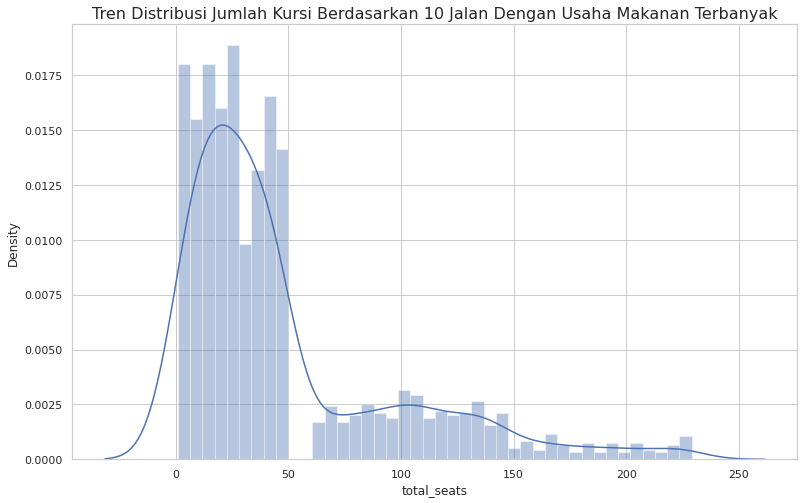

In [ ]:
# Melihat tren distribusi kursinya
plt.figure(figsize=(13,8))
sns.distplot(seats_dis_for_top_10['total_seats'])
plt.title('Tren Distribusi Jumlah Kursi Berdasarkan 10 Jalan Dengan Usaha Makanan Terbanyak', fontsize=16)
plt.show()

kesimpulan:

Bahwa trend distribusi untuk jumlah kursi dari 10 nama jalan tersebut 50 kursi atau dibawah 50 kursi.

## Kesimpulan & Rekomendasi

### Kesimpulan

Usaha jenis Restoran sangat mendominasi sebesar 75%, sementara yang tertinggi kedua yaitu Fast Food sebesar 11%. Sisanya untuk Bakert, Bar, Cafe, dan Pizza berdara di bawah 10% untuk di kota LA. Bahwa usaha yang tidak melakukan chain lebih sebesar 61,9% dibanding yang melakukan chain sebesar 38,1%. Usaha makanan yang dimana biasanya menggunakan chain yaitu usaha yang dimana menu makanannya bisa di `take away` hal itu bisa di liat pada grafiknya bahwa urutan pertama yaitu bakery, cafe, fast food, pizza, restaurant, bar.

Bahwa untuk ciri-ciri usaha yang menggunakan chain bahwa penggunaan tempat duduk lebih sedikit dibanding yang tidak menggunakan chain. Tetapi, untuk usaha makanan seperti `Fast Food` dan `Cafe` lebih banyak tempat duduk untuk yang menggunakan chain dari pada yang tidak menggunakan chain, hal ini dapat dibuktikan dengan grafik diatas. Baik untuk usaha yang tempat duduknya dibawah 50 maupun diatas 50.

Jumlah jalan yang hanya ada 1 usaha makanan di LA sebanyak 2481. Bahwa trend distribusi untuk jumlah kursi dari 10 nama jalan tersebut 50 kursi atau dibawah 50 kursi.

Bahwa Usaha makanan yang paling banyak kursinya secara berurutan, yaitu:
- `Restoran` dengan rata-rata kursi: 48 kursi
- `Bar` dengan rata-rata kursi: 45 kursi
- `Fast` Food dengan rata-rata kursi: 32 kursi
- `Pizza` dengan rata-rata kursi: 29 kursi
- `Cafe` dengan rata-rata kursi: 25 kursi
- `Bakery` dengan rata-rata kursi: 22 kursi

Adapun 10 nama jalan dengan jumlah usaha makanan terbanyak di LA berdasarkan urutan, yaitu:
- `W SUNSET BLVD` dengan jumlah usaha makanan sebanyak: 296
- `W PICO BLVD` dengan jumlah usaha makanan sebanyak: 288
- `HOLLYWOOD BLVD` dengan jumlah usaha makanan sebanyak: 167
- `WULSHIRE BLVD` dengan jumlah usaha makanan sebanyak: 161
- `S VERMONT AVE` dengan jumlah usaha makanan sebanyak: 148
- `SANTA MONICA BLVD` dengan jumlah usaha makanan sebanyak: 146
- `W 3RD ST` dengan jumlah usaha makanan sebanyak: 145
- `BEVERLY BLVD` dengan jumlah usaha makanan sebanyak: 135
- `S FIGUEROA ST` dengan jumlah usaha makanan sebanyak: 134
- `MEROSE AVE` dengan jumlah usaha makanan sebanyak: 128

### Rekomendasi

Setelah menganalisa berbagai temuan dari data-data diatas bahwa kami merekomendasikan usaha `Restoran` dengan konsep pelayanan robot dengan kondisi yang potensional mendapatkan keuntungan yang besar dengan usaha `non-rantai`, karena dengan basis usaha non-rantai tidak terikat aturan-aturan seperti usaha `rantai` dan memaksimalkan kreatifitas dalam usahanya. Untuk usahanya dibuat khusus untuk `dine in` atau makan di tempat dan kurangin porsi untuk `take away` karena konsepnya akan menggunakan robot sebagai daya tarik usaha makanan tersebut. 

Kursi untuk tempat usahanya sebiaknya kisaran 40-50 kursi untuk memaksimalkan konsep robot sebagai pelayanannya agar dapat memanjakan dan membuat lebih nyaman untuk para konsumennya. Dan untuk lokasinya berada di salah satu nama jalan dengan kondisi usaha makanan terbanyak. Alasannya karena jalan-jalan tersebut menjadi pusat usaha makanan, dan banyak juga orang-orang yang datang untuk pergi menikmati kuliner karena 10 nama jalan tersebut sudah terkenal akan usaha makanan yang banyak dan beragam.

Link Presentasi PPT : https://docs.google.com/presentation/d/1l8eCkt0tQpODE2nsr4fL5eCHctcVcN7NobRqm-hvrzg/edit?usp=sharing

Link Presentasi PDF : https://drive.google.com/file/d/14GVG6ARuwHE4TYZgcUPjO2c9HVMWqnJi/view?usp=share_link

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Ariq! Sebagian besar kamu telah menyelesaikan project ini dengan baik dan tidak ada revisi ya!
    
Keep going Ariq, you are doing very well!
    

</div>